# Prelim Skills Exam

Performed by: Jericho Paul C. Ecubin

Submitted to: Engr. Roman Richard

1. Build and train a CNN model from a scratch.  Apply different regularization techniques and data preprocessing to reduce overfitting.

2.  Plot the training and validation loss and accuracy. The target accuracy is 85 and above.

3.  Use the assigned pre-trained model and fine-tuned it. 

4. Build and train a CNN model using the modified pretrained model.

5. Plot the training and validation loss and accuracy. The target accuracy is 95 and above.

6. Use the classification report, confusion matrix and ROC over AUC metric to evaluate also the performance of the scratch and using pre-trained mode

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preprocessing

In [2]:
xray_df = pd.read_csv(r'PSE_Datasets\Data_Entry_2017.csv')
xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
76070,00018663_000.png,Mass,0,18663,31,F,AP,2500,2048,0.168,0.168,NaN
51984,00013112_001.png,No Finding,1,13112,50,F,PA,2992,2991,0.143,0.143,NaN
41353,00010698_011.png,No Finding,11,10698,74,F,AP,2500,2048,0.168,0.168,NaN
45496,00011677_001.png,Infiltration,1,11677,7,F,AP,2048,2500,0.168,0.168,NaN
32250,00008446_000.png,No Finding,0,8446,59,F,AP,2500,2048,0.168,0.168,NaN


In [3]:
xray_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [4]:
xray_df.rename(columns={'OriginalImage[Width': 'OriginalImage_Width',
                        'Height]': 'OriginalImage_Height',
                        'OriginalImagePixelSpacing[x':'OriginalImagePixelSpacing_x',
                        'y]':'OriginalImagePixelSpacing_y'}, inplace = True)
xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Unnamed: 11
81522,00020043_008.png,No Finding,8,20043,45,F,AP,3056,2544,0.139,0.139,NaN
46306,00011837_010.png,Atelectasis,10,11837,44,M,PA,2992,2669,0.143,0.143,NaN
76351,00018735_010.png,No Finding,10,18735,17,F,PA,2786,2991,0.143,0.143,NaN
46734,00011925_059.png,Effusion|Mass,59,11925,54,M,AP,2500,2048,0.168,0.168,NaN
67098,00016587_000.png,Pneumothorax,0,16587,48,F,AP,3056,2544,0.139,0.139,NaN


In [5]:
from glob import glob
xray_img_path = {os.path.basename(x): x for x in glob(os.path.join('PSE_Datasets', 'images*', '*', '*.png'))}
print('Total images scanned:', len(xray_img_path))
print('Total index', xray_df.shape[0])

Total images scanned: 112120
Total index 112120


In [6]:
xray_df['Image_Path'] = xray_df['Image Index'].map(xray_img_path.get)
xray_df.sample(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage_Width,OriginalImage_Height,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y,Unnamed: 11,Image_Path
50217,00012701_004.png,No Finding,4,12701,78,M,PA,2500,2048,0.168,0.168,NaN,PSE_Datasets\images_006\images\00012701_004.png
86013,00021208_000.png,Cardiomegaly|Infiltration,0,21208,77,M,PA,2992,2991,0.143,0.143,NaN,PSE_Datasets\images_010\images\00021208_000.png
6771,00001820_002.png,No Finding,2,1820,47,M,AP,2500,2048,0.171,0.171,NaN,PSE_Datasets\images_002\images\00001820_002.png
65169,00016091_000.png,No Finding,0,16091,19,F,AP,2500,2048,0.168,0.168,NaN,PSE_Datasets\images_008\images\00016091_000.png
93718,00023601_003.png,No Finding,3,23601,51,M,PA,2786,2623,0.143,0.143,NaN,PSE_Datasets\images_010\images\00023601_003.png


In [7]:
# Making the values into list and splitting indexes that have multiple value in target feature.
from itertools import chain

labels = np.unique(list(chain(*xray_df['Finding Labels'].map(lambda x: x.split('|')).tolist())))
labels = [x for x in labels if len(x)>0]
print('All Labels ({}): {}'.format(len(labels), labels))

for c_label in labels:
    if len(c_label)>1: # leave out empty labels
        xray_df[c_label] = xray_df['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)

All Labels (15): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


We can see that the target feature can have single or multiple value, this dataset is a multiclass classification.

### Creating Model.

In [9]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(xray_df, test_size = 0.25, random_state = 42, stratify = xray_df['Finding Labels'].map(lambda x: x[:4]))

In [10]:
train_df['findings'] = train_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)
test_df['findings'] = test_df.apply(lambda x: x['Finding Labels'].split('|'), axis=1)

In [11]:
train_df['findings'].sample(10)

55332                   [No Finding]
73482           [Pleural_Thickening]
60324                 [Infiltration]
21919                   [No Finding]
70091                   [No Finding]
70930                   [No Finding]
5479                    [No Finding]
7565     [Atelectasis, Infiltration]
24844                   [No Finding]
44444     [Mass, Pleural_Thickening]
Name: findings, dtype: object

In [12]:
from keras.preprocessing.image import ImageDataGenerator

idg = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)

In [17]:
traindf_gen = idg.flow_from_dataframe(train_df, directory=None,
                                      x_col = 'Image_Path',
                                      y_col = 'findings',
                                      class_mode = 'categorical',
                                      classes=labels,
                                      target_size = (224, 224),
                                      color_mode = 'grayscale',
                                      batch_size = 32)

testdf_gen = idg.flow_from_dataframe(test_df, directory=None,
                                     x_col = 'Image_Path',
                                     y_col = 'findings',
                                     class_mode = 'categorical',
                                     classes=labels,
                                     target_size = (224, 224),
                                     color_mode = 'grayscale',
                                     batch_size = 512)

X_test, y_test = next(idg.flow_from_dataframe(test_df, directory=None,
                                              x_col = 'Image_Path',
                                              y_col = 'findings',
                                              class_mode = 'categorical',
                                              classes=labels,
                                              target_size = (224, 224),
                                              color_mode = 'grayscale',
                                              batch_size = 1024))

X_train, y_train = next(traindf_gen)

Found 84090 validated image filenames belonging to 15 classes.
Found 28030 validated image filenames belonging to 15 classes.
Found 28030 validated image filenames belonging to 15 classes.


In [19]:
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D

#### Convolutional Neural Network from scratch.

In [20]:
model_1 = Sequential()

model_1.add(Conv2D(32, (2,2), strides=1, input_shape = X_train.shape[1:]))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (2,2), strides=1))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(32, (2,2), strides=1))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (2,2), strides=1))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(64, (2,2), strides=1))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (2,2), strides=1))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(128, (2,2), strides=1))
model_1.add(Activation('relu'))
model_1.add(Conv2D(128, (2,2), strides=1))
model_1.add(Activation('relu'))

model_1.add(MaxPooling2D(2,2))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(128, activation = 'relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(len(labels), activation = 'sigmoid'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 223, 223, 32)      160       
                                                                 
 activation_8 (Activation)   (None, 223, 223, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      4128      
                                                                 
 activation_9 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 32)      0         
                                                      

In [21]:
model_1.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)
hist_1 = model_1.fit(traindf_gen,        
                    epochs = 5,
                    verbose = 1,
                    steps_per_epoch=50,
                    validation_data = (X_test, y_test))

Epoch 1/5
50/50 [==============================] - 23s 442ms/step - loss: 0.2718 - binary_accuracy: 0.9039 - val_loss: 0.3056 - val_binary_accuracy: 0.9171
Epoch 2/5
50/50 [==============================] - 23s 458ms/step - loss: 0.2403 - binary_accuracy: 0.9164 - val_loss: 0.2341 - val_binary_accuracy: 0.9171
Epoch 3/5
50/50 [==============================] - 22s 429ms/step - loss: 0.2304 - binary_accuracy: 0.9187 - val_loss: 0.2458 - val_binary_accuracy: 0.9173
Epoch 4/5
50/50 [==============================] - 22s 443ms/step - loss: 0.2256 - binary_accuracy: 0.9206 - val_loss: 0.2243 - val_binary_accuracy: 0.9194
Epoch 5/5
50/50 [==============================] - 22s 430ms/step - loss: 0.2248 - binary_accuracy: 0.9211 - val_loss: 0.2227 - val_binary_accuracy: 0.9232


##### Training and validation's accuracy and loss plotting of CNN from scratch.

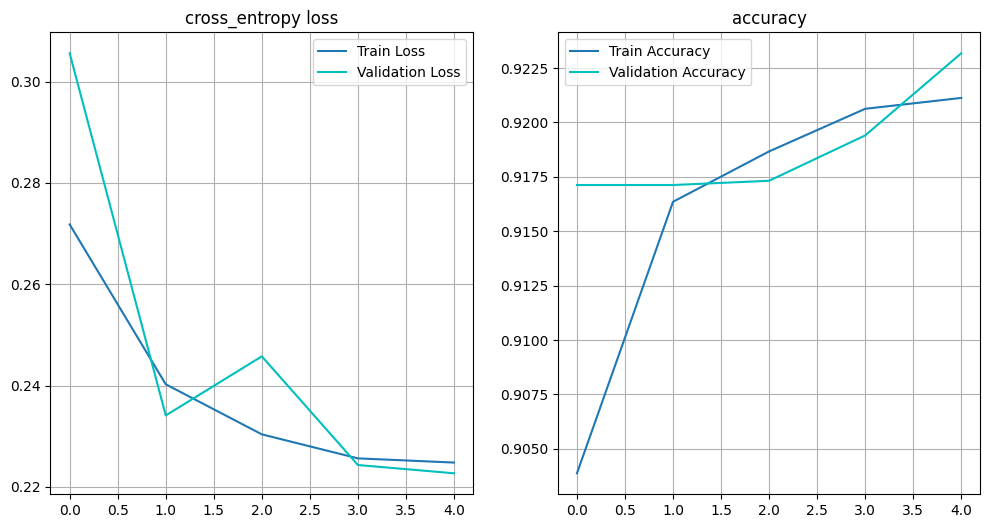

In [23]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'-', label="Train Loss")
    ax.plot(history.history["val_loss"],'c-', label="Validation Loss")
    ax.legend()
    ax.set_title('cross_entropy loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["binary_accuracy"],'-', label="Train Accuracy")
    ax.plot(history.history["val_binary_accuracy"],'c-', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)
    

plot_loss_accuracy(hist_1)

In [24]:
y_pred = model_1.predict(X_test, batch_size = 32, verbose = True)

32/32 [==============================] - 1s 26ms/step


In [25]:
y_pred.shape, y_test.shape

((1024, 15), (1024, 15))

##### ROC Curve of CNN from scratch

Text(0, 0.5, 'True Positive Rate')

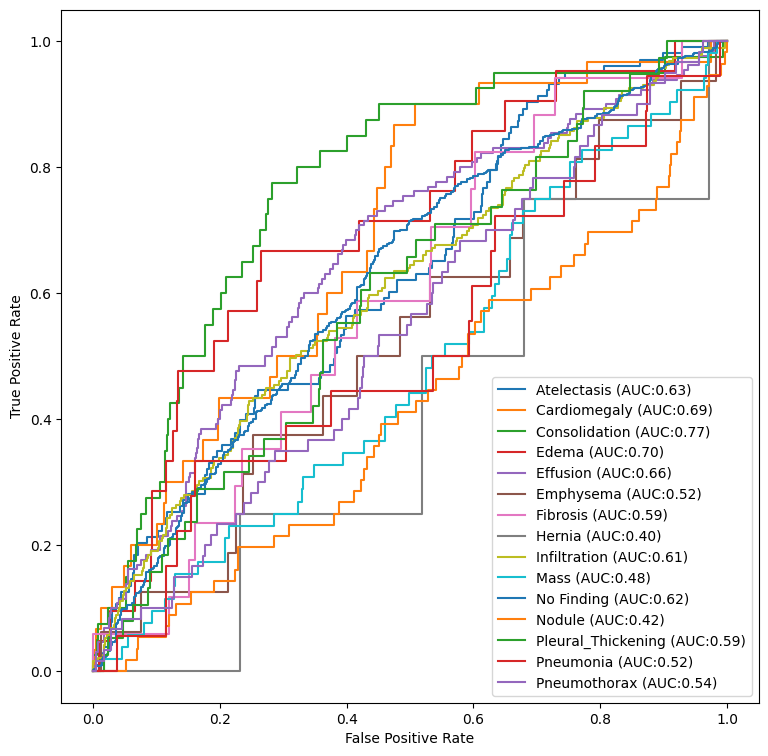

In [26]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

#### CNN using Pretrained Model - DenseNet201

In [29]:
from keras.applications import densenet
from keras.models import Model

pretrained_model = densenet.DenseNet201(input_shape =  X_train.shape[1:], include_top = False, weights = None)

#Freeze densenet model layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = pretrained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
predictions = Dense(len(labels), activation='sigmoid')(x)

# Create the final model
finetuned_pretrained_model = Model(inputs=pretrained_model.input, outputs=predictions)

finetuned_pretrained_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 1)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  3136        ['zero_padding2d_2[0][0]']       
                                )                                                           

##### Training and validation's accuracy and loss plotting of CNN using DenseNet201 model.

In [30]:
finetuned_pretrained_model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)
hist_pretrained = finetuned_pretrained_model.fit(traindf_gen,        
                    epochs = 10,
                    verbose = 1,
                    steps_per_epoch=50,
                    validation_data = (X_test, y_test))

Epoch 1/10
50/50 [==============================] - 39s 611ms/step - loss: 0.2805 - binary_accuracy: 0.9104 - val_loss: 0.2277 - val_binary_accuracy: 0.9171
Epoch 2/10
50/50 [==============================] - 28s 550ms/step - loss: 0.2166 - binary_accuracy: 0.9211 - val_loss: 0.2250 - val_binary_accuracy: 0.9171
Epoch 3/10
50/50 [==============================] - 28s 556ms/step - loss: 0.2159 - binary_accuracy: 0.9218 - val_loss: 0.2246 - val_binary_accuracy: 0.9171
Epoch 4/10
50/50 [==============================] - 28s 552ms/step - loss: 0.2192 - binary_accuracy: 0.9192 - val_loss: 0.2276 - val_binary_accuracy: 0.9171
Epoch 5/10
50/50 [==============================] - 28s 553ms/step - loss: 0.2252 - binary_accuracy: 0.9158 - val_loss: 0.2260 - val_binary_accuracy: 0.9171
Epoch 6/10
50/50 [==============================] - 28s 552ms/step - loss: 0.2172 - binary_accuracy: 0.9212 - val_loss: 0.2246 - val_binary_accuracy: 0.9171
Epoch 7/10
50/50 [==============================] - 28s 55

##### Training and validation's accuracy and loss plotting of CNN using DenseNet201 model.

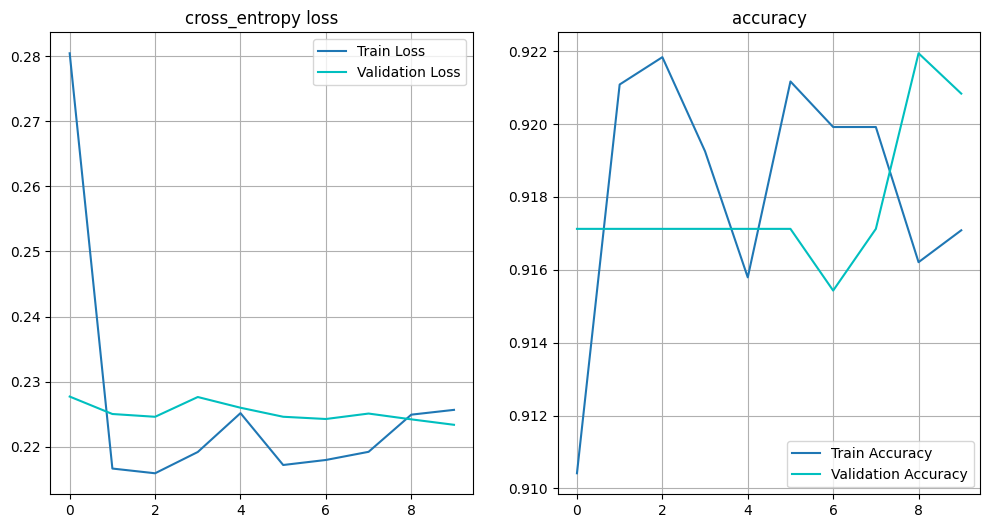

In [31]:
plot_loss_accuracy(hist_pretrained)

In [32]:
y_pred_pretrained = finetuned_pretrained_model.predict(X_test, batch_size = 32, verbose = True)

32/32 [==============================] - 9s 195ms/step


##### ROC Curve of CNN using DenseNet201 model.

Text(0, 0.5, 'True Positive Rate')

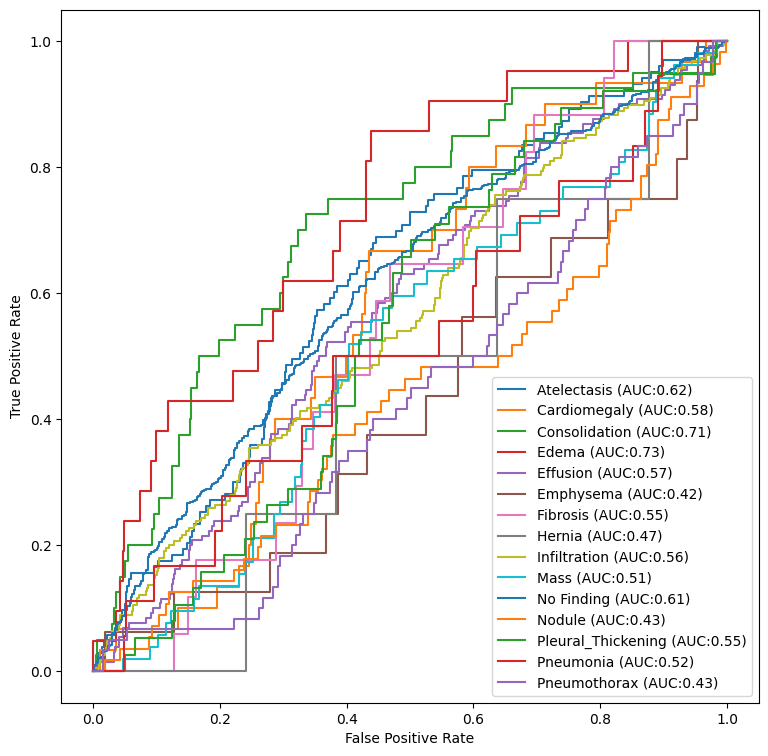

In [33]:
from sklearn.metrics import roc_curve, auc
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(labels):
    fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred_pretrained[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')

### Conclusion

- The NIH Chest X-ray dataset is well-suited for multiclass classification tasks using CNNs due to its large size. The CNN models I trained achieved high accuracy and low loss, demonstrating effective learning from the data. However, the dataset has a significant class imbalance, with 'No Finding' being the most frequent class. This imbalance can limit the model's performance on less frequent classes, causing a plateau in accuracy at lower epochs. In conclusion, while the NIH dataset's size is advantageous for CNN training, addressing class imbalance is crucial to improve model performance for all classes, especially those with fewer examples.